In [1]:
#!/usr/bin/env python3

import os, sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl


try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass
delphesDir = os.path.abspath("./DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT


ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

color_j1 = 'tab:blue'
color_j2 = 'tab:red'



Welcome to JupyROOT 6.30/06


## Read events

In [2]:
# file = 'dijet_test.root'
file = 'pp2dijet/Events/run_01/dijet_pT20_delphes_events.root'

In [3]:
def getJetInfo(jets,etamax=2.5):
    
    pT1,pT2 = 0.0,0.0
    jets = [j for j in jets if abs(j.Eta) < etamax]
    nj = len(jets)
    jets = sorted(jets, key=lambda j: j.PT, reverse=True)
    if nj > 0:
        pT1 = jets[0].PT
    if nj > 1:
        pT2 = jets[1].PT
    return (nj,pT1,pT2)


### Get jet pT

In [4]:
f = ROOT.TFile(file,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()
data = []
data_truth = []
data_parton = []
for ievt in range(nevts):
    tree.GetEntry(ievt)

    # for iptc,ptc in enumerate(tree.Particle):
    #     print(f'{iptc}: PDG = {ptc.PID}, Status = {ptc.Status}, Px = {ptc.Px}, Py = {ptc.Py}, Pz = {ptc.Pz}, Pt = {ptc.PT} Eta = {ptc.Eta}')
    #     if iptc > 10:
    #         break    
    # if ievt > 0:
    #     break
    # Parton-level
    parton_final = [ptc for ptc in tree.Particle if ptc.Status == 23]
    data_parton.append(getJetInfo(parton_final))
    
    # Truth-level
    data_truth.append(getJetInfo(tree.GenJet))

    # Detector-level
    data.append(getJetInfo(tree.Jet))


f.Close()
data = np.array(data,dtype=[('nj',int),('pT1',float),('pT2',float)])
data_truth = np.array(data_truth,dtype=[('nj',int),('pT1',float),('pT2',float)])
data_parton = np.array(data_parton,dtype=[('nj',int),('pT1',float),('pT2',float)])

# Plot jet multiplicity

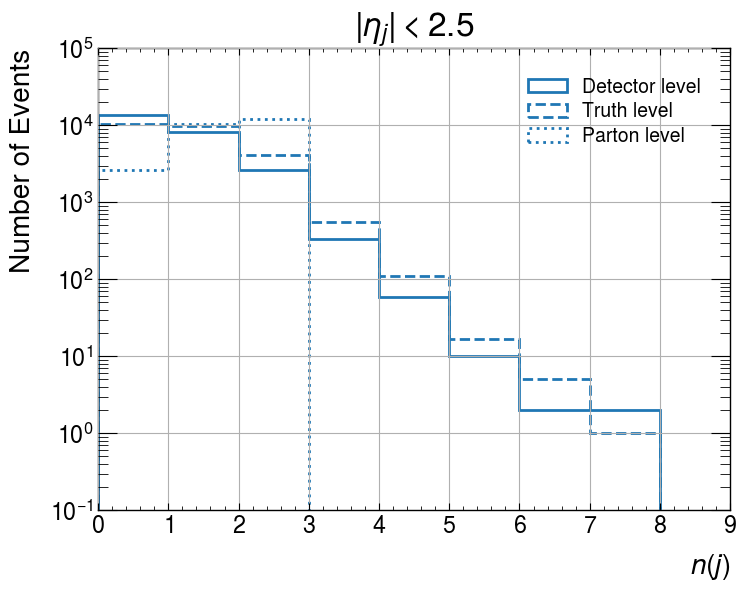

In [10]:
bins = np.arange(0.,10.,1.)

plt.hist(data['nj'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Detector level',linewidth=2)

plt.hist(data_truth['nj'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')

plt.hist(data_parton['nj'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
plt.yscale('log')
plt.xlabel(r'$n(j)$')
plt.ylabel('Number of Events')
plt.legend(framealpha=1.0)
plt.title(r'$|\eta_j| < 2.5$')
plt.grid()
plt.show()

# Plot jet pT

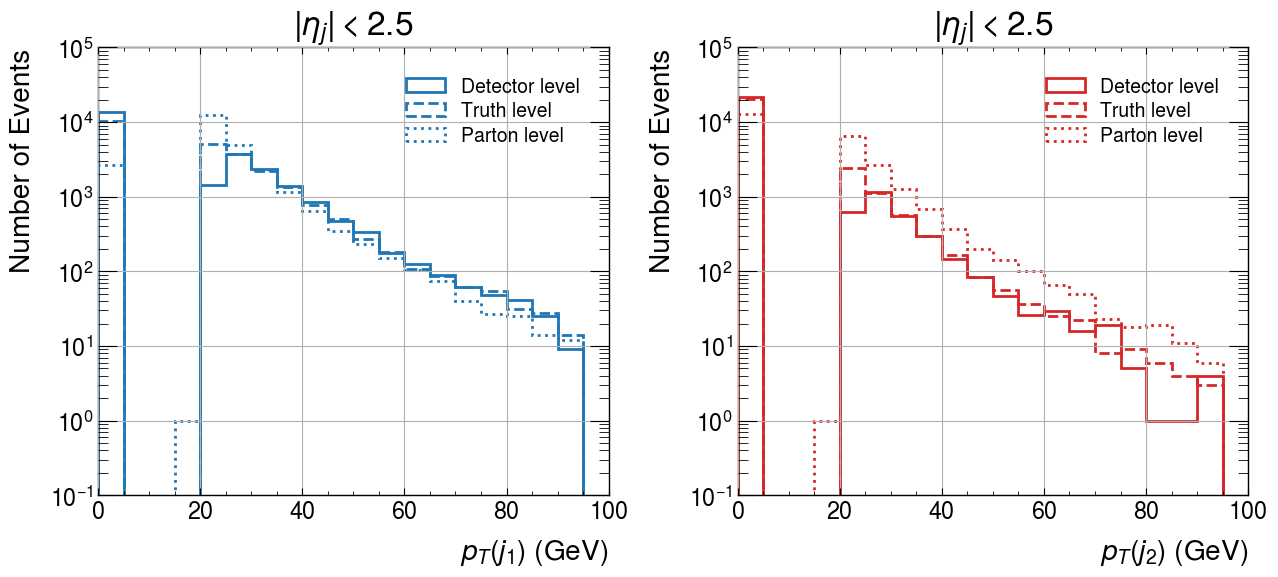

In [14]:
bins = np.arange(0.,100.,5.)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,6))

ax[0].hist(data['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Detector level',linewidth=2)
ax[1].hist(data['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Detector level',linewidth=2)

ax[0].hist(data_truth['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')
ax[1].hist(data_truth['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')

ax[0].hist(data_parton['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
ax[1].hist(data_parton['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
for a in ax:
    a.set_yscale('log')
    a.set_ylabel('Number of Events')
# plt.vlines(x=[10.,25.,35.],ymin=1e-5,ymax=1,linestyles='dashed',colors='red')
    a.set_xlim(0.,100)
    a.legend(framealpha=1.0)
    a.set_title(r'$|\eta_j| < 2.5$')
    a.grid()

ax[0].set_xlabel(r'$p_T(j_1)$ (GeV)')
ax[1].set_xlabel(r'$p_T(j_2)$ (GeV)')
# plt.ylim(1e-4,1)
plt.tight_layout()
plt.show()

## Select events with pT(j1) > 40 Gev

In [15]:
data1 = data[data['pT1']>40.0]
data_truth1 = data_truth[data_truth['pT1']>40.0]
data_parton1 = data_parton[data_parton['pT1']>40.0]

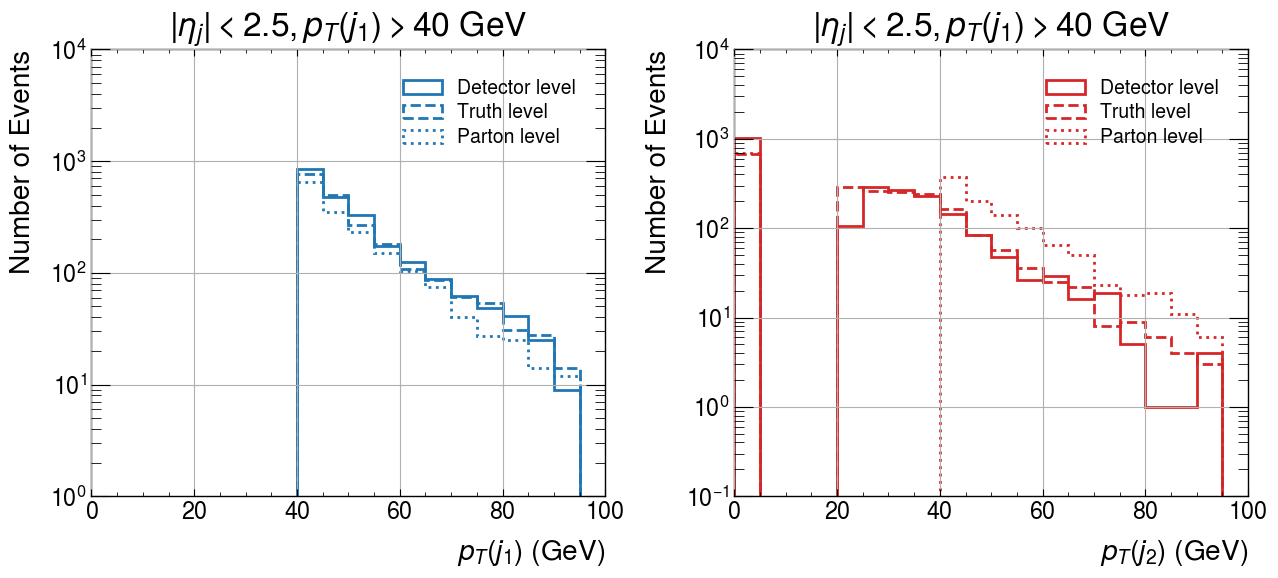

In [16]:
bins = np.arange(0.,100.,5.)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,6))

ax[0].hist(data1['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Detector level',linewidth=2)
ax[1].hist(data1['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Detector level',linewidth=2)

ax[0].hist(data_truth1['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')
ax[1].hist(data_truth1['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')

ax[0].hist(data_parton1['pT1'],bins=bins,color=color_j1,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
ax[1].hist(data_parton1['pT2'],bins=bins,color=color_j2,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
for a in ax:
    a.set_yscale('log')
    a.set_ylabel('Number of Events')
# plt.vlines(x=[10.,25.,35.],ymin=1e-5,ymax=1,linestyles='dashed',colors='red')
    a.set_xlim(0.,100)
    a.legend(framealpha=1.0)
    a.set_title(r'$|\eta_j| < 2.5, p_T(j_1) > 40$ GeV')
    a.grid()

ax[0].set_xlabel(r'$p_T(j_1)$ (GeV)')
ax[1].set_xlabel(r'$p_T(j_2)$ (GeV)')
# plt.ylim(1e-4,1)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7601/1031696891.py:3: RuntimeWarning: invalid value encountered in divide
  plt.hist(data['pT1']/(data['pT1']+data['pT2']),bins=bins,color=color_j1,
/tmp/ipykernel_7601/1031696891.py:7: RuntimeWarning: invalid value encountered in divide
  plt.hist(data_truth['pT1']/(data_truth['pT1']+data_truth['pT2']),bins=bins,color=color_j1,
/tmp/ipykernel_7601/1031696891.py:11: RuntimeWarning: invalid value encountered in divide
  plt.hist(data_parton['pT1']/(data_parton['pT1']+data_parton['pT2']),bins=bins,color=color_j1,


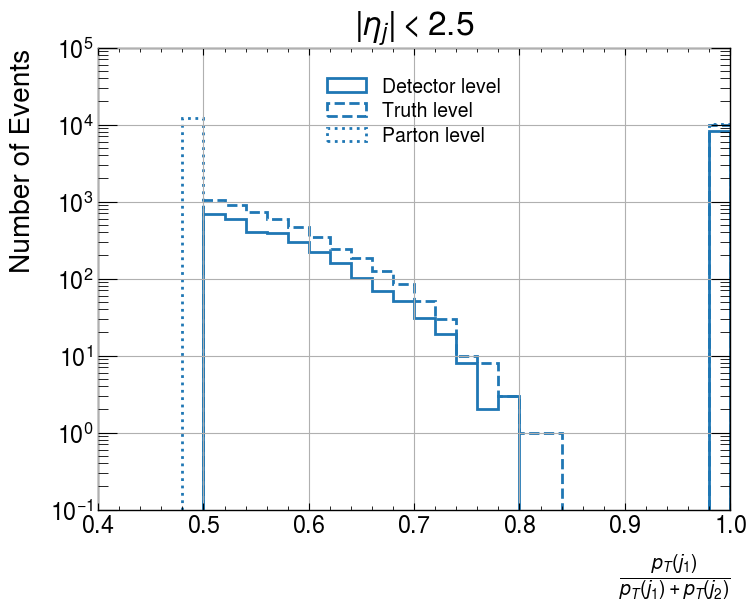

In [30]:
bins = np.arange(0.4,1.02,0.02)

plt.hist(data['pT1']/(data['pT1']+data['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Detector level',linewidth=2)

plt.hist(data_truth['pT1']/(data_truth['pT1']+data_truth['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')

plt.hist(data_parton['pT1']/(data_parton['pT1']+data_parton['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
plt.yscale('log')
plt.xlabel(r'$\frac{p_T (j_1)}{p_T(j_1) + p_T(j_2)}$')
plt.ylabel('Number of Events')
plt.legend(framealpha=1.0)
plt.title(r'$|\eta_j| < 2.5$')
plt.grid()
plt.show()

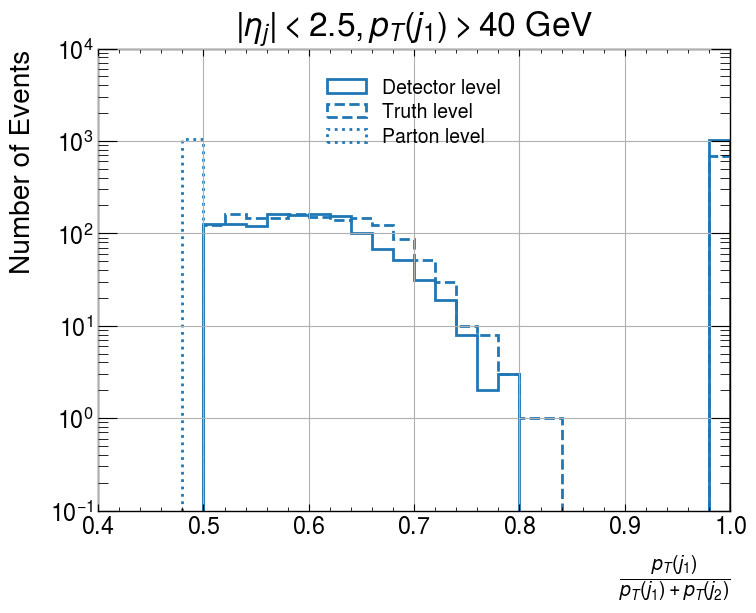

In [29]:
bins = np.arange(0.4,1.02,0.02)

plt.hist(data1['pT1']/(data1['pT1']+data1['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Detector level',linewidth=2)

plt.hist(data_truth1['pT1']/(data_truth1['pT1']+data_truth1['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Truth level',linewidth=2,linestyle='dashed')

plt.hist(data_parton1['pT1']/(data_parton1['pT1']+data_parton1['pT2']),bins=bins,color=color_j1,
             histtype='step',
             label=r'Parton level',linewidth=2,linestyle='dotted')
plt.yscale('log')
plt.xlabel(r'$\frac{p_T (j_1)}{p_T(j_1) + p_T(j_2)}$')
plt.ylabel('Number of Events')
plt.legend(framealpha=1.0)
plt.title(r'$|\eta_j| < 2.5, p_T(j_1) > 40$ GeV')
plt.grid()
plt.show()

### Compute ratio of 2 jet to 1 jet events

In [20]:
R = len(data1[data1['pT2']>40.0])/len(data1)
print(f'R = {R:1.2f} (detector level)')
R_truth = len(data_truth1[data_truth1['pT2']>40.0])/len(data_truth1)
print(f'R = {R_truth:1.2f} (truth level)')
R_parton = len(data_parton1[data_parton1['pT2']>40.0])/len(data_parton1)
print(f'R = {R_parton:1.2f} (parton level)')

R = 0.17 (detector level)
R = 0.20 (truth level)
R = 0.60 (parton level)
